[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_8.2_Deep_Learning_with_TensorFlow_and_Keras.ipynb)

## Assignment 8.2: Deep Learning with TensorFlow and Keras

### Instructions:

This assignment focuses on building a deep learning model for image classification using TensorFlow and Keras. You will experiment with increasing the depth of the neural network to improve performance.

### Tasks:
1. **Task 1**: Build a deep neural network model with **two hidden layers**.
   - Use the **Sequential API**.
   - Input layer: 784 neurons (for MNIST 28x28 images, flattened).
   - First hidden layer: 128 neurons with **ReLU** activation.
   - Second hidden layer: 64 neurons with **ReLU** activation.
   - Output layer: 10 neurons with **softmax** activation.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential()

model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

2. **Task 2**: Compile the model with the following parameters:
   - **Loss function**: Categorical Crossentropy.
   - **Optimizer**: Adam.
   - **Metrics**: Accuracy.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


3. **Task 3**: Load the **Fashion MNIST dataset** from `keras.datasets`.
   - Normalize the images to a range of 0 to 1.
   - Split the data into training and test sets.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


4. **Task 4**: Train the model with the **training data**.
   - Use **10 epochs** and a **batch size** of 32.
   - Add validation data (20% of the training data).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7627 - loss: 0.6677 - val_accuracy: 0.8523 - val_loss: 0.4086
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8598 - loss: 0.3840 - val_accuracy: 0.8492 - val_loss: 0.4031
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8724 - loss: 0.3461 - val_accuracy: 0.8777 - val_loss: 0.3409
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8853 - loss: 0.3108 - val_accuracy: 0.8770 - val_loss: 0.3404
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8896 - loss: 0.3006 - val_accuracy: 0.8819 - val_loss: 0.3298
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8949 - loss: 0.2785 - val_accuracy: 0.8857 - val_loss: 0.3217
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2679 - val_accuracy: 0.8877 - val_loss: 0.3209
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9039 - loss: 0.2534

5. **Task 5**: Evaluate the model on the **test set** and print the following:
   - Accuracy on the test set.
   - Confusion matrix.

313/313 - 2s - 7ms/step - accuracy: 0.8659 - loss: 0.3931
Test Accuracy: 86.59%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


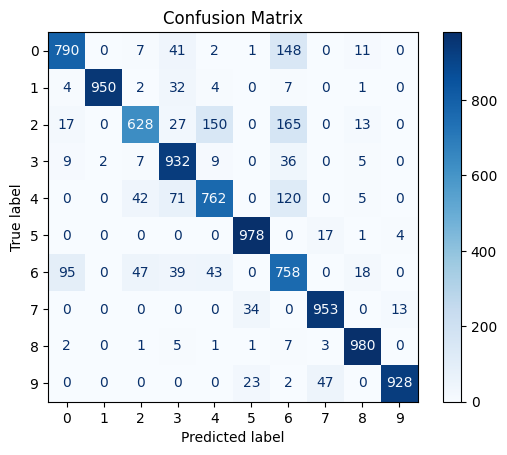

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

6. **Task 6** (Optional): Experiment with **Dropout** layers.
   - Add a **Dropout layer** after the second hidden layer with a dropout rate of 0.2.
   - Train the model and compare performance with the original model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

print(f"Original Test Accuracy: {test_accuracy * 100:.2f}%")

model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(10, activation='softmax'))

model_dropout.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train,
                                     y_train,
                                     epochs=10,
                                     batch_size=32,
                                     validation_split=0.2)

test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy with Dropout: {test_accuracy_dropout * 100:.2f}%")


Original Test Accuracy: 86.59%
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7374 - loss: 0.7576 - val_accuracy: 0.8487 - val_loss: 0.4156
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8509 - loss: 0.4103 - val_accuracy: 0.8695 - val_loss: 0.3626
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8678 - loss: 0.3631 - val_accuracy: 0.8638 - val_loss: 0.3754
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8754 - loss: 0.3406 - val_accuracy: 0.8764 - val_loss: 0.3396
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8805 - loss: 0.3247 - val_accuracy: 0.8651 - val_loss: 0.3628
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8856 - loss: 0.3073 - val_accuracy: 0.8835 - val_loss: 0.3190
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8923 - loss: 0.2875 - val_accuracy: 0.8861 - val_loss: 0.3179
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - 

#### Bonus Assignment (Optional):
Train a deep learning model using the **CIFAR-10 dataset**.
- Build a neural network with at least three hidden layers.
- Use **Batch Normalization** and **Dropout** to improve performance.
- Compare the model's performance with and without these techniques.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255, X_test.astype('float32') / 255
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def create_model_with_bn_dropout():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'), BatchNormalization(), Dropout(0.5),
        Dense(256, activation='relu'), BatchNormalization(), Dropout(0.5),
        Dense(128, activation='relu'), BatchNormalization(), Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

for model_func in [create_model_with_bn_dropout, create_model]:
    model = model_func()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.2047 - loss: 2.5566 - val_accuracy: 0.3291 - val_loss: 1.8488
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3135 - loss: 1.8988 - val_accuracy: 0.3640 - val_loss: 1.7811
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3381 - loss: 1.8245 - val_accuracy: 0.3387 - val_loss: 1.8125
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3479 - loss: 1.8060 - val_accuracy: 0.3610 - val_loss: 1.7782
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.3421 - loss: 1.8122 - val_accuracy: 0.3529 - val_loss: 1.8126
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.3487 - loss: 1.8105 - val_accuracy: 0.3754 - val_loss: 1.7475
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3492 - loss: 1.8080 - val_accuracy: 0.3279 - val_loss: 1.8410
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━

---